## 数据分析&机器学习

在机器学习中，流程通常为
1. 数据探索，对样本数量、样本基础字段、字段数据类型、缺失值及异常值、样本分布等信息进行探索分析。
2. 数据预处理，通常是对样本数据中缺失值和异常值进行处理，此外当样本非常不平衡时，需要非平衡处理。
3. 特征工程，特征工程是机器学习中较为重要且比较繁杂的部分，较为常用的方法是基于统计和实际业务的人为构建特征。
4. 特征选择，其目的是帮我们选择更有用的特征，提高训练的模型的预测准确度，降低过拟合。
5. 模型训练，用一些算法，通过对样本特征数据及其标签的学习，训练出一套具有预测能力的模型。
6. 预测评估，对于模型准确度的评估。
7. 模型优化，当模型效果表现不好时，需要重新构建特征、调节算法参数等工作。

下面将把以上流程分为数据分析及机器学习两个部分进行评测。评测采用数据为IJCAI18第一轮训练数据及测试数据，数据已存入data文件夹内。（数据详情入口：[IJCAI18](https://tianchi.aliyun.com/competition/information.htm?spm=5176.100067.5678.2.373c2163PpY08X&raceId=231647)）

整个过程采用的语言为Python。需要代码编写区域形式如下：
```
### 代码开始 ###
你的代码
### 代码结束 ###
```
会提示大约需要多少行代码可以完成。

**注：非代码编写区域代码不要更改！**


### 数据分析
这一部分主要进行数据探索、数据预处理、简单的特征工程（One-Hot编码）。

#### 导入模块
在进行分析之前，我们需要导入可能用到的Python库。
* [numpy](http://www.numpy.org/)，数据科学计算库。
* [pandas](http://pandas.pydata.org/)，具有操作性很强的数据结构。
* [matplotlib](https://matplotlib.org/)，画图工具。
* [sklearn](http://scikit-learn.org/)，常用的机器学习工具库。

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

#### 读取原始文件
读取文件可以用pandas库中的函数。原始数据文件格式为`.txt`。

In [2]:
# 读取原始数据
### 代码开始 ###（大约2行代码）
ijcai_train = pd.read_table("./data/ijcai18_train.txt", sep=" ")
ijcai_test = pd.read_table("./data/ijcai18_test.txt", sep=" ")
### 代码结束 ### 

# 打印出原始训练样本和测试样本的维度
print("IJCAI 测试样本维度： " + str(ijcai_train.shape))
print("IJCAI 测试样本维度： " + str(ijcai_test.shape))

IJCAI 测试样本维度： (478138, 27)
IJCAI 测试样本维度： (18371, 26)


期望输出：
```
IJCAI 测试样本维度： (478138, 27)
IJCAI 测试样本维度： (18371, 26)
```
#### 数据抽样
因为原始数据的样本数量较多，在后续模型训练过程中可能造成训练时间过长，而这并不是此次评测想要看到的，所以，我们只通过简单随机抽样的方法抽取原始训练样本和测试样本数据的20%。

In [3]:
np.random.seed(2) #设置随机种子，以保证划分后的样本维度和期望输出维度相同。

# 对原始训练样本和测试样本数据进行抽样，抽样比例为20%
### 代码开始 ### （大约4行代码）
stay_flag = np.random.rand(ijcai_train.shape[0])
ijcai_new_train = ijcai_train[stay_flag <= 0.2]
stay_flag = np.random.rand(ijcai_test.shape[0])
ijcai_new_test = ijcai_test[stay_flag <= 0.2]
### 代码结束 ### 

# 将抽取出来的数据的索引进行重新排序
ijcai_new_train = ijcai_new_train.reset_index().drop(["index"], axis=1)
ijcai_new_test = ijcai_new_test.reset_index().drop(["index"], axis=1)

# 打印抽样后的维度
print("随机抽样后的训练样本维度： " + str(ijcai_new_train.shape))
print("随机抽样后的测试样本维度： " + str(ijcai_new_test.shape))


随机抽样后的训练样本维度： (96378, 27)
随机抽样后的测试样本维度： (3696, 26)


期望输出：
```
随机抽样后的训练样本维度： (96378, 27)

随机抽样后的测试样本维度： (3696, 26)
```

**注意：接下来我们都是对抽样过后的数据进行分析和处理！**
#### 数据探索

In [4]:
# 查看抽取后的训练样本数据前五行
ijcai_new_train.head()

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,...,context_page_id,predict_category_property,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade
0,5754713551599725161,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4001,5799347067982556520:9172976955054793469;790838...,6765930309048922341,4,1.000000,5002,1.000000,1.000000,1.000000,0
1,8802991093903959363,285660928590172217,7908382889764677758;8277336076276184272,2072967855524022579;5131280576272319091;263639...,9057103201734987852,548352491538518780,8,9,8,13,...,4001,"8277336076276184272:5131280576272319091,820214...",4885989684392199728,15,0.985427,5012,0.974878,0.976863,0.969278,0
2,7972325483281584825,285660928590172217,7908382889764677758;8277336076276184272,2072967855524022579;5131280576272319091;263639...,9057103201734987852,548352491538518780,8,9,8,13,...,4001,"4879721024980945592:2636395404473730413,719936...",4885989684392199728,15,0.985427,5012,0.974878,0.976863,0.969278,1
3,5394134991759971072,285660928590172217,7908382889764677758;8277336076276184272,2072967855524022579;5131280576272319091;263639...,9057103201734987852,548352491538518780,8,9,8,13,...,4001,8277336076276184272:820214312075361939;5096600...,4885989684392199728,15,0.985427,5012,0.974878,0.976863,0.969278,0
4,4876117478498068156,285660928590172217,7908382889764677758;8277336076276184272,2072967855524022579;5131280576272319091;263639...,9057103201734987852,548352491538518780,8,9,8,13,...,4001,8277336076276184272:820214312075361939;5799347...,4885989684392199728,15,0.985427,5012,0.974878,0.976863,0.969278,0


通过对数据基础字段进行查看（[IJCAI18](https://tianchi.aliyun.com/competition/information.htm?spm=5176.100067.5678.2.373c2163PpY08X&raceId=231647)），我们发现该数据为分类问题，且样本标签（即`is_trade`字段）只有`0`和`1`，所以可以暂时理解为二分类问题。对于这类问题我们首先要看其总体正负样本分布。

In [5]:
# 统计正负样本。
### 代码开始 ### （大约2行代码）
pos_samples = ijcai_new_train["is_trade"][ijcai_new_train["is_trade"] == 1].count()
neg_samples = ijcai_new_train["is_trade"][ijcai_new_train["is_trade"] == 0].count()
### 代码结束 ### 

print("正样本个数： " + str(pos_samples))
print("负样本个数： " + str(neg_samples))

正样本个数： 1847
负样本个数： 94531


期望输出：
```
正样本个数： 1847
负样本个数： 94531
```

在数据中具有时间属性字段，而原始数据中用时间戳进行表示，无法直接使用，所以需要我们进行转换。

**时间戳转换函数**

In [6]:
# 时间戳转换函数
def stamptrans(timestamp):
    '''
    参数：
    timestamp：长整型，Unix时间戳。
    
    返回值：
    dt：字符串，转换后的时间，格式为%Y-%m-%d %H:%M。
    '''
    ### 代码开始 ### （大约3行代码）
    format = "%Y-%m-%d %H:%M"
    timestamp = time.localtime(timestamp)
    dt = time.strftime(format, timestamp)
    ### 代码结束 ### 
    
    return dt

利用编写的时间戳转换函数，将样本中的相关字段进行转换（训练数据和测试数据），并在样本中添加名为`context_timestamp_trans`的字段进行保存。

In [7]:
# Unix时间戳转换
### 代码开始 ### （大约2行）
ijcai_new_train["context_timestamp_trans"] = ijcai_new_train.context_timestamp.apply(stamptrans)
ijcai_new_test["context_timestamp_trans"] = ijcai_new_test.context_timestamp.apply(stamptrans)
### 代码结束 ###

print(ijcai_new_train["context_timestamp_trans"].head())

0    2018-09-18 12:00
1    2018-09-18 23:38
2    2018-09-18 14:44
3    2018-09-18 21:52
4    2018-09-18 22:41
Name: context_timestamp_trans, dtype: object


期望输出：
```
0        2018-09-18 12:00
1        2018-09-18 23:38
2        2018-09-18 14:44
3        2018-09-18 21:52
4        2018-09-18 22:41
Name: context_timestamp_trans, dtype: object
```
通过查看转换结果，我们可以看到时间以日期+小时分钟的形式展现出来，为了方便接下来我们对某一天或某一小时的相关数据进行统计分析，需要将这种形式的时间表示进行进一步划分，即把年、月、日、时、分拆分并在已有数据基础上形成新的字段进行保存。

（提示：因为该数据中，年份和月份都是相同的，所以我们只需要提取日、时、分进行分别保存即可。）

In [8]:
# 时间切割函数
def splitime(strtime, idx):
    '''
    参数：
    strtime：字符串类型，形如%Y-%m-%d %H:%M的时间串。
    idx：整型，列表下标，要返回日、小时还是分钟，分别对应0、1、2。
    
    返回值：
    caches[idx]：整型，返回caches[idx]元素，其中caches包含整型的日、小时、分钟。
    '''
    
    ### 代码开始 ### （大约4行代码）
    [year_month_day, dtime] = strtime.split()
    day = year_month_day.split("-")[2]
    hour, minutes = dtime.split(":")[0:2]
    caches = [day, hour, minutes]
    ### 代码结束 ###
    
    return caches[idx]

运用时间切割函数`splitime`，将训练样本和测试样本中的`context_timestamp_trans`字段中的时间进行切割，新建并保存到`day`、`hour`、`minutes`字段中。

In [9]:
# 切割并保存
### 代码开始 ### （大约2行代码）
ijcai_new_train["day"], ijcai_new_train["hour"], ijcai_new_train["minutes"] = ijcai_new_train.context_timestamp_trans.apply(splitime, idx=0), ijcai_new_train.context_timestamp_trans.apply(splitime, idx=1), ijcai_new_train.context_timestamp_trans.apply(splitime, idx=2)
ijcai_new_test["day"], ijcai_new_test["hour"], ijcai_new_test["minutes"] = ijcai_new_test.context_timestamp_trans.apply(splitime, idx=0), ijcai_new_test.context_timestamp_trans.apply(splitime, idx=1), ijcai_new_test.context_timestamp_trans.apply(splitime, idx=2)
### 代码结束 ### 

print(ijcai_new_train["hour"].head())

0    12
1    23
2    14
3    21
4    22
Name: hour, dtype: object


期望输出结果
```
0    12
1    23
2    14
3    21
4    22
Name: hour, dtype: int64
```
到现在，我们就完成了对时间戳的处理，这样，我们就可以对每一天的每个小时的正样本数量、负样本数量及总量的变化进行作图。（注：此处指训练样本。）

**样本连续变化图**

In [10]:
# 做出样本数据连续变化图

# 第一步：统计样本中的天数
### 代码开始 ### （大约1行代码）
day_arr = ijcai_new_train["day"].unique()
### 代码结束 ###

# 对天数进行排序。
day_arr = np.sort(day_arr)

# 第二步：
# 统计每天样本总数、正样本数、正样本/样本总数;
# 每一天中的每个小时的样本总数、正样本数、正样本/样本总数；
# 将数据保存到文件到data文件夹下，按天的信息保存到day_info.csv，按每天的每个小时的统计数据保存到hour_info.csv。
### 代码开始 ### （大约14行代码）
data_use = ijcai_new_train[["is_trade", "day", "hour"]]
hour_info = pd.DataFrame()
day_info = pd.DataFrame()
for day in day_arr:
    temp = data_use[data_use["day"] == day]
    temp["sum"] = 1
    tmp_hour = temp.groupby(["hour"]).agg("sum")
    tmp_hour["rate"] = tmp_hour["is_trade"]/tmp_hour["sum"]
    hour_info = pd.concat([hour_info, tmp_hour])
    tmp_day = temp.groupby(["day"]).agg("sum")
    tmp_day["rate"] = tmp_day["is_trade"]/tmp_day["sum"]
    day_info = pd.concat([day_info, tmp_day])

hour_info.to_csv("./data/hour_info.csv")
day_info.to_csv("./data/day_info.csv")
### 代码结束 ###

print("day:")
print(day_arr)
# 以天为单位的统计信息
print("day_info:")
print(day_info)
# 以小时为单位的统计信息
print("hour_info:")
print(hour_info.head())

day:
['18' '19' '20' '21' '22' '23' '24']
day_info:
     is_trade    sum      rate
day                           
18        304  15806  0.019233
19        273  14367  0.019002
20        313  13835  0.022624
21        275  14279  0.019259
22        271  13842  0.019578
23        229  12638  0.018120
24        182  11611  0.015675
hour_info:
      is_trade  sum      rate
hour                         
00           7  374  0.018717
01           2  128  0.015625
02           3   67  0.044776
03           3   61  0.049180
04           2   39  0.051282


期望输出：
```
day:
['18' '19' '20' '21' '22' '23' '24']
day_info:
     is_trade    sum      rate
day                           
18        304  15806  0.019233
19        273  14367  0.019002
20        313  13835  0.022624
21        275  14279  0.019259
22        271  13842  0.019578
23        229  12638  0.018120
24        182  11611  0.015675
hour_info:
      is_trade  sum      rate
hour                         
00           7  374  0.018717
01           2  128  0.015625
02           3   67  0.044776
03           3   61  0.049180
04           2   39  0.051282
```
将每天的信息和每天的每个小时的样本信息统计完成之后，可以以小时为单位画连续这些天的样本总量变化图、正样本数量变化图和以天为单位的样本比率，成交比例等。

（提示：可以直接用pandas DataFrame的plot函数）

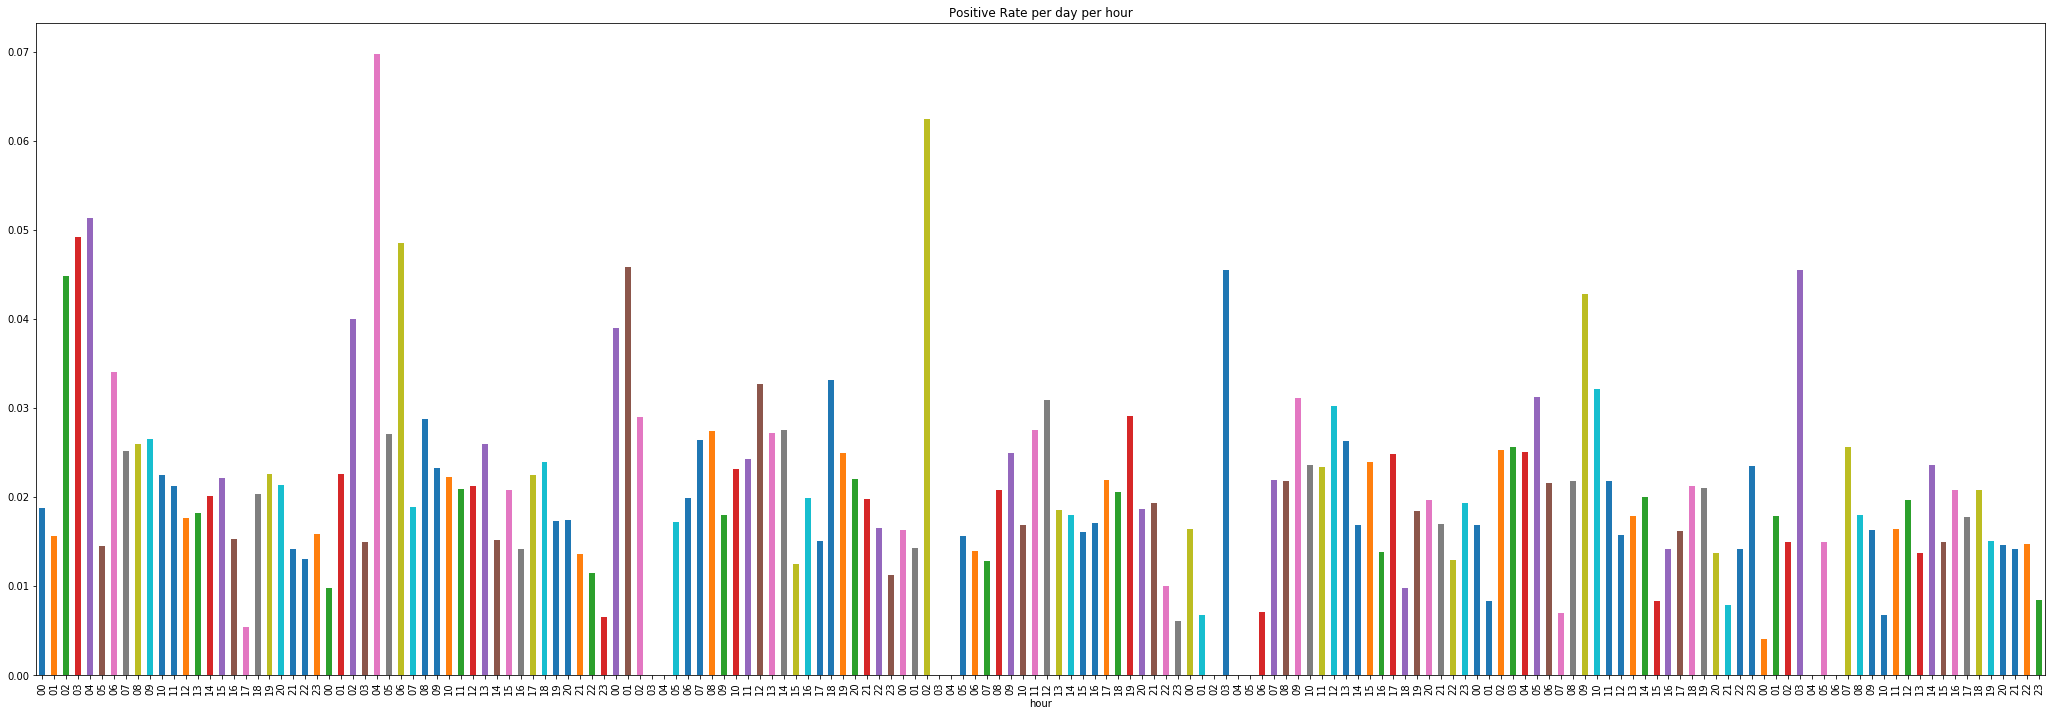

In [11]:
# 正样本比率变化图，以小时为单位，要求柱状图
### 代码开始 ### （大约2行代码）
hour_info["rate"].plot(kind="bar", figsize=(36, 12), title="Positive Rate per day per hour")
plt.show()
### 代码结束 ###

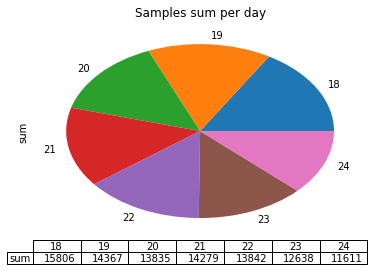

In [12]:
# 每天样本总数，以天为单位，要求饼状图
### 代码开始 ### （大约2行代码）
day_info["sum"].plot(kind="pie", title="Samples sum per day", table=True)
plt.show()
### 代码结束 ###

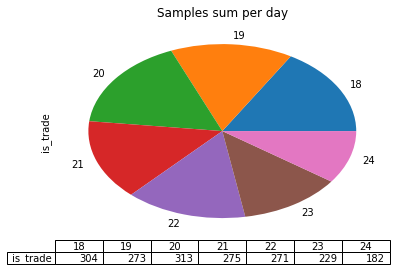

In [13]:
# 每天正样本数， 以天为单位，要求饼状图
### 代码开始 ### （大约2行代码）
day_info["is_trade"].plot(kind="pie", title="Samples sum per day", table=True)
plt.show()
### 代码结束 ###

统计每天的样本变化情况会帮助了解样本分布，获得一些有用的信息。

#### 数据预处理

在做完样本分布的分析之后，我们要对样本缺失值等进行统计和处理。

**数据缺失值统计**

原始字段中有两种数据类型，字符串型和数值型，所以统计时，需要加以区分。（此处只统计训练数据即可。）

In [14]:
# 缺失值统计
### 代码开始 ### （大约5行代码）
for col in ijcai_new_train.columns:
    if ijcai_new_train[col].dtypes != 'O':
        print("字段名：{0}，缺失数：{1}，缺失比例：{2}。\n".format(col, ijcai_new_train[ijcai_new_train[col] == -1][col].count(), ijcai_new_train[ijcai_new_train[col] == -1][col].count()/ijcai_new_train[col].count()))
    else:
        print("字段名：{0}，缺失数：{1}，缺失比例：{2}。\n".format(col, ijcai_new_train[ijcai_new_train[col] == "-1"][col].count(), ijcai_new_train[ijcai_new_train[col] == "-1"][col].count()/ijcai_new_train[col].count()))
### 代码结束 ###

字段名：instance_id，缺失数：0，缺失比例：0.0。

字段名：item_id，缺失数：0，缺失比例：0.0。

字段名：item_category_list，缺失数：0，缺失比例：0.0。

字段名：item_property_list，缺失数：0，缺失比例：0.0。

字段名：item_brand_id，缺失数：90，缺失比例：0.0009338230716553571。

字段名：item_city_id，缺失数：54，缺失比例：0.0005602938429932142。

字段名：item_price_level，缺失数：0，缺失比例：0.0。

字段名：item_sales_level，缺失数：179，缺失比例：0.0018572703314034323。

字段名：item_collected_level，缺失数：0，缺失比例：0.0。

字段名：item_pv_level，缺失数：0，缺失比例：0.0。

字段名：user_id，缺失数：0，缺失比例：0.0。

字段名：user_gender_id，缺失数：2643，缺失比例：0.027423270870945652。

字段名：user_age_level，缺失数：180，缺失比例：0.0018676461433107141。

字段名：user_occupation_id，缺失数：180，缺失比例：0.0018676461433107141。

字段名：user_star_level，缺失数：180，缺失比例：0.0018676461433107141。

字段名：context_id，缺失数：0，缺失比例：0.0。

字段名：context_timestamp，缺失数：0，缺失比例：0.0。

字段名：context_page_id，缺失数：0，缺失比例：0.0。

字段名：predict_category_property，缺失数：0，缺失比例：0.0。

字段名：shop_id，缺失数：0，缺失比例：0.0。

字段名：shop_review_num_level，缺失数：0，缺失比例：0.0。

字段名：shop_review_positive_rate，缺失数：0，缺失比例：0.0。

字段名：shop_star_level，缺失数：0，缺失比例：0.0。

字段名：shop_

期望输出：
```
字段名：instance_id，缺失数：0，缺失比例：0.0。
字段名：item_id，缺失数：0，缺失比例：0.0。
字段名：item_category_list，缺失数：0，缺失比例：0.0。
字段名：item_property_list，缺失数：0，缺失比例：0.0。
字段名：item_brand_id，缺失数：90，缺失比例：0.0009338230716553571。
.
.
.

字段名：is_trade，缺失数：0，缺失比例：0.0。
字段名：context_timestamp_trans，缺失数：0，缺失比例：0.0。
字段名：day，缺失数：0，缺失比例：0.0。
字段名：hour，缺失数：0，缺失比例：0.0。
字段名：minutes，缺失数：0，缺失比例：0.0。
```

从统计来看，样本缺失度比较低。

接下来，通过统计每一个字段的唯一值。（此处只统计训练数据即可。）

In [15]:
# 唯一值统计
### 代码开始 ### （大约2行代码）
for col in ijcai_new_train.columns:
    print("字段名称：{0}，唯一值个数：{1}，唯一值列表：{2}。\n".format(col, ijcai_new_train[col].unique().shape[0], ijcai_new_train[col].unique()))
### 代码结束 ###

字段名称：instance_id，唯一值个数：96377，唯一值列表：[5754713551599725161 8802991093903959363 7972325483281584825 ...
 5307935891681475459  477737900698382237 4623253188146764341]。

字段名称：item_id，唯一值个数：6806，唯一值列表：[3412720377098676069  285660928590172217 5202355029344881809 ...
 5813439311965339744 5640507991384614935 5621212945513603977]。

字段名称：item_category_list，唯一值个数：14，唯一值列表：['7908382889764677758;5799347067982556520'
 '7908382889764677758;8277336076276184272'
 '7908382889764677758;5755694407684602296'
 '7908382889764677758;2436715285093487584'
 '7908382889764677758;509660095530134768'
 '7908382889764677758;8710739180200009128'
 '7908382889764677758;2011981573061447208'
 '7908382889764677758;7258015885215914736'
 '7908382889764677758;4879721024980945592'
 '7908382889764677758;3203673979138763595'
 '7908382889764677758;2642175453151805566;8868887661186419229'
 '7908382889764677758;1968056100269760729'
 '7908382889764677758;22731265849056483'
 '7908382889764677758;2642175453151805566;6233669177166538628'

期望输出：
```
字段名称：instance_id，唯一值个数：96377，唯一值列表：[5754713551599725161 8802991093903959363 7972325483281584825 ...
 5307935891681475459  477737900698382237 4623253188146764341]。
.
.
.
字段名称：shop_star_level，唯一值个数：21，唯一值列表：[5002 5012 5010 5018 5011 5013 5007 5014 5008 5009 5015 5017 5003 5005
 5016 5004 5001 5020 5006 5000 5019]。
字段名称：day，唯一值个数：7，唯一值列表：['18' '21' '19' '20' '22' '23' '24']。
字段名称：hour，唯一值个数：24，唯一值列表：['12' '23' '14' '21' '22' '16' '15' '09' '10' '13' '19' '00' '08' '17'
 '20' '07' '11' '04' '02' '18' '06' '01' '05' '03']。
字段名称：minutes，唯一值个数：60，唯一值列表：['00' '38' '44' '52' '41' '01' '29' '48' '51' '42' '18' '10' '57' '25'
 '06' '17' '31' '56' '26' '13' '54' '05' '23' '35' '20' '14' '12' '33'
 '32' '45' '47' '07' '02' '50' '30' '09' '34' '11' '49' '28' '16' '40'
 '36' '53' '15' '39' '08' '46' '59' '19' '04' '22' '21' '24' '43' '37'
 '03' '27' '55' '58']。
```
统计每个字段唯一值的目的是判断该字段为连续型还是离散型，通过统计结果，我们可以判断，除了ID类字段，还有等级类字段也是离散的。评分类字段是连续的。所以，对于评分类字段可以填充平均值，对于等级类字段填充众数。

**缺失值填充**

评分类字段`shop_score_service`，`shop_score_delivery`，`shop_score_description`填充平均值。（注：训练数据和测试数据都需要填充。）

In [16]:
# 用平均数填充缺失值
### 代码开始 ### （大约3行代码）
for col in ["shop_score_service", "shop_score_delivery", "shop_score_description"]:
    ijcai_new_train[col].replace(-1, ijcai_new_train[col].mean(), inplace=True)
    ijcai_new_test[col].replace(-1, ijcai_new_test[col].mean(), inplace=True)
### 代码结束 ###
for col in ["shop_score_service", "shop_score_delivery", "shop_score_description"]:
    print("训练数据")
    print("字段名：{0}，缺失数：{1}，缺失比例：{2}。\n".format(col, ijcai_new_train[ijcai_new_train[col] == -1][col].count(), ijcai_new_train[ijcai_new_train[col] == -1][col].count()/ijcai_new_train[col].count()))
    print("测试数据")
    print("字段名：{0}，缺失数：{1}，缺失比例：{2}。\n".format(col, ijcai_new_test[ijcai_new_test[col] == -1][col].count(), ijcai_new_test[ijcai_new_test[col] == -1][col].count()/ijcai_new_test[col].count()))

训练数据
字段名：shop_score_service，缺失数：0，缺失比例：0.0。

测试数据
字段名：shop_score_service，缺失数：0，缺失比例：0.0。

训练数据
字段名：shop_score_delivery，缺失数：0，缺失比例：0.0。

测试数据
字段名：shop_score_delivery，缺失数：0，缺失比例：0.0。

训练数据
字段名：shop_score_description，缺失数：0，缺失比例：0.0。

测试数据
字段名：shop_score_description，缺失数：0，缺失比例：0.0。



期望输出：
```
训练数据
字段名：shop_score_service，缺失数：0，缺失比例：0.0。
.
.
.
```
等级类字段`item_sales_level`、`user_star_level`、`item_city_id`、`user_gender_id`和`user_occupation_id`填充众数。（注：训练数据和测试数据都需要填充。）

In [17]:
# 用平均数填充缺失值
### 代码开始 ### （大约3行代码）
for col in ["item_sales_level", "user_star_level", "user_gender_id", "user_occupation_id", "item_city_id"]:
    ijcai_new_train[col].replace(-1, ijcai_new_train[col].mode()[0], inplace=True)
    ijcai_new_test[col].replace(-1, ijcai_new_test[col].mode()[0], inplace=True)
### 代码结束 ###
for col in ["item_sales_level", "user_star_level", "user_gender_id", "user_occupation_id", "item_city_id"]:
    print("训练数据")
    print("字段名：{0}，缺失数：{1}，缺失比例：{2}。\n".format(col, ijcai_new_train[ijcai_new_train[col] == -1][col].count(), ijcai_new_train[ijcai_new_train[col] == -1][col].count()/ijcai_new_train[col].count()))
    print("测试数据")
    print("字段名：{0}，缺失数：{1}，缺失比例：{2}。\n".format(col, ijcai_new_test[ijcai_new_test[col] == -1][col].count(), ijcai_new_test[ijcai_new_test[col] == -1][col].count()/ijcai_new_test[col].count()))

训练数据
字段名：item_sales_level，缺失数：0，缺失比例：0.0。

测试数据
字段名：item_sales_level，缺失数：0，缺失比例：0.0。

训练数据
字段名：user_star_level，缺失数：0，缺失比例：0.0。

测试数据
字段名：user_star_level，缺失数：0，缺失比例：0.0。

训练数据
字段名：user_gender_id，缺失数：0，缺失比例：0.0。

测试数据
字段名：user_gender_id，缺失数：0，缺失比例：0.0。

训练数据
字段名：user_occupation_id，缺失数：0，缺失比例：0.0。

测试数据
字段名：user_occupation_id，缺失数：0，缺失比例：0.0。

训练数据
字段名：item_city_id，缺失数：0，缺失比例：0.0。

测试数据
字段名：item_city_id，缺失数：0，缺失比例：0.0。



期望输出：
```
训练数据
字段名：item_sales_level，缺失数：0，缺失比例：0.0。

测试数据
字段名：item_sales_level，缺失数：0，缺失比例：0.0。
.
.
.
```
**One-Hot编码**

One-Hot编码是一种常用的数据处理的方法，此处只对字段`user_gender_id`和`user_occupation_id`进行编码处理。（注：训练数据和测试数据都需要处理，可以调用sklearn库，也可以自己写函数，建议直接调用库。）

In [18]:
# 对user_gender_id和user_occupation_id进行one-hot处理，并拼接到数据集中。
### 代码开始 ### （大约5行代码）
enc = OneHotEncoder()
enc.fit(ijcai_new_train[["user_gender_id", "user_occupation_id"]])
ijcai_new_train = pd.concat([ijcai_new_train, pd.DataFrame(enc.transform(ijcai_new_train[[ "user_gender_id", "user_occupation_id"]]).toarray())], axis=1)
enc.fit(ijcai_new_test[["user_gender_id", "user_occupation_id"]])
ijcai_new_test = pd.concat([ijcai_new_test, pd.DataFrame(enc.transform(ijcai_new_test[[ "user_gender_id", "user_occupation_id"]]).toarray())], axis=1)
### 代码结束 ###

In [19]:
print("ijcai_new_train.shape: " + str(ijcai_new_train.shape))
print("ijcai_new_test.shape: " + str(ijcai_new_test.shape))

ijcai_new_train.shape: (96378, 38)
ijcai_new_test.shape: (3696, 37)


期望输出：
```
ijcai_new_train.shape: (96378, 38)
ijcai_new_test.shape: (3696, 37)
```
至此，关于数据分析的评测部分结束，下面是机器学习部分评测内容。

### 机器学习
该部分包括特征选择、特征重要性分析、模型训练、交叉验证、模型预测、模型评估等。所使用的数据是`ijcai_new_train`和`ijcai_new_test`。

注：该部分主要以调包为主，所以只做描述性要求，不进行标准结果提示。

**导入需要的库**

提示：主要用到`sklearn`相关库和`matplotlib`画图库

In [20]:
### 代码开始 ### （2~10行代码）
import sklearn.feature_selection as fs 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
### 代码结束 ###

c:\program files\python36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


从数据中选取如下数据作为训练及测试数据。

In [21]:
X_train = ijcai_new_train.drop(["predict_category_property", "item_property_list", "item_category_list", "context_timestamp_trans", "is_trade"], axis=1)
y_train = ijcai_new_train[["is_trade"]]
X_test = ijcai_new_test.drop(["predict_category_property", "item_property_list", "item_category_list", "context_timestamp_trans"], axis=1)
print("X_train.shape: " + str(X_train.shape))
print("X_train.shape: " + str(y_train.shape))
print("X_train.shape: " + str(X_test.shape))

X_train.shape: (96378, 33)
X_train.shape: (96378, 1)
X_train.shape: (3696, 33)


**特征选择及特征重要性分析**

采用两种或两种以上以上不同的方法进行选择，采用其中一套数据集记性训练、预测即可。

In [22]:
# 特征选择及特征重要性分析，将特征重要性表保存到data文件夹下，命名为featselect1.csv
def featselect1(X, y):
    '''
    参数:
    X：pandas dataframe，样本特征数据。
    y：pandas dataframe，样本标签数据
    
    Return:
    X_selected： pandas dataframe, 经过选择的特征数据。
    feats_dropped： 列表，被去掉的特征。
    feats_flag：列表，特征是否保存的标志。
    '''
    
    ### 代码开始 ###(大约16行代码)
    feats_name = list(X.columns.values)
    feats_dropped = []
    feat_info = pd.DataFrame(feats_name)

    gbdt = GradientBoostingClassifier()
    gbdt.fit(X.values, y.values.ravel())
    feat_select = fs.SelectFromModel(gbdt,prefit=True)
    feat_info["feature_score"] = pd.DataFrame(gbdt.feature_importances_)
    # get dropped features
    feats_flag = feat_select.get_support()
    for i in range(len(feats_flag)):
        if feat_select.get_support()[i] == False:
            feats_dropped.append(feats_name[i])
    X_selected = X.drop(columns=feats_dropped)

    # get feature importance scores and save to file
    feat_info.columns = ["feature", "feature_importance"]
    feat_info = feat_info.sort_values("feature_importance", ascending=False)
    feat_info.to_csv("./data/featselect1.csv")
    ### 代码结束 ###
    
    return X_selected, feats_dropped, feats_flag

# Function: 特征选择及特征重要性分析，将特征重要性表保存到data文件夹下，命名为featselect2.csv
def featselect2(X, y):
    '''
    参数:
    X：pandas dataframe，样本特征数据。
    y：pandas dataframe，样本标签数据
    
    Return:
    X_selected： pandas dataframe, 经过选择的特征数据。
    feats_dropped： 列表，被去掉的特征。
    feats_flag：列表，特征是否保存的标志。
    '''
    
    ### 代码开始 ###(大约16行代码)
    feats_name = list(X.columns.values)
    feats_dropped = []
    feat_info = pd.DataFrame(feats_name)

    gbdt = GradientBoostingClassifier()
    gbdt.fit(X.values, y.values.ravel())
    feat_select = fs.SelectFromModel(gbdt,prefit=True)
    feat_info["feature_score"] = pd.DataFrame(gbdt.feature_importances_)
    # get dropped features
    feats_flag = feat_select.get_support()
    for i in range(len(feats_flag)):
        if feat_select.get_support()[i] == False:
            feats_dropped.append(feats_name[i])
    X_selected = X.drop(columns=feats_dropped)

    # get feature importance scores and save to file
    feat_info.columns = ["feature", "feature_importance"]
    feat_info = feat_info.sort_values("feature_importance", ascending=False)
    feat_info.to_csv("./data/featselect2.csv")
    ### 代码结束 ###
    
    return X_selected, feats_dropped, feats_flag

调用特征选择函数，获得相关数据。

In [23]:
# 特征选择，得到选择后的训练数据等
X_train_selected, feats_dropped, feats_flag = featselect1(X_train, y_train)

# 对测试数据的数据进行相同规则的特征选择
### 代码开始 ### （大约1行代码）
X_test_selected = X_test[X_test.columns[feats_flag]]
### 代码结束 ###

print("X_train_selected.shape: " + str(X_train_selected.shape))
print("X_test_selected.shape: " + str(X_test_selected.shape))

X_train_selected.shape: (96378, 13)
X_test_selected.shape: (3696, 13)


**建模，并进行CV**

可以选用GBDT、LR等可用模型。

In [24]:
### 代码开始 ### （大约4行代码）
X_train_s, X_dev_s, y_train_s, y_dev_s = train_test_split(X_train_selected, y_train, test_size=.2, random_state=0)
clf = LogisticRegression()
clf.fit(X_train_s, y_train_s)
scores = clf.score(X_dev_s, y_dev_s)
### 代码结束 ###
print(scores)

0.980805146295912


**评估（AUC）**

评估（AUC）并且画图

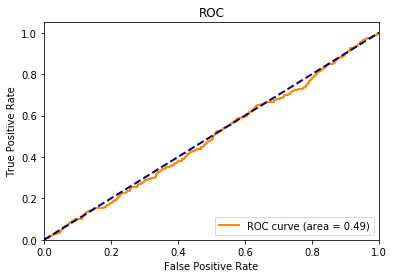

In [25]:
### 代码开始 ### （大约13行）
y_dev_s_predprobs = clf.predict_proba(X_dev_s)[:, 1]
fpr, tpr, threshold = roc_curve(y_dev_s, y_dev_s_predprobs)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr, color="darkorange", lw=lw, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])  
plt.xlabel("False Positive Rate")  
plt.ylabel("True Positive Rate")  
plt.title("ROC")  
plt.legend(loc="lower right")
plt.show()
### 代码结束 ###

**预测**

对测试数据进行预测，并将预测结果（概率）和 样本ID输出到`result`文件夹下的`result.csv`文件中。输出结果要求只有样本ID和预测概率两列，列名可以随意命名。

In [26]:
### 代码开始 ### （大约3行代码）
y_predprobs = clf.predict_proba(X_test_selected)[:, 1]
res_info = pd.DataFrame({"instance_id": X_test["instance_id"], "predict_score": y_predprobs})
res_info.to_csv("./result/result.csv", index=False)
### 代码结束 ###

**结束**